In [1]:
import numpy as np 

In [2]:
import pandas as pd 

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
import os
os.chdir('/Users/divine/Documents/MBS /PGE 2 /S2/Finance appliquée avec Python /Rapport/2019:2020')

In [6]:
df = pd.read_excel('NDAQ2019.xlsx') 

In [7]:
print(df)

          Date        META     NASDAQ
0   2019-01-02  135.536194  24.891493
1   2019-01-03  131.600372  24.221569
2   2019-01-04  137.803787  25.183434
3   2019-01-07  137.903687  24.525803
4   2019-01-08  142.378937  24.455120
..         ...         ...        ...
499 2020-12-23  267.825806  40.755970
500 2020-12-24  267.116577  40.969387
501 2020-12-28  276.706421  41.042652
502 2020-12-29  276.486633  41.135021
503 2020-12-30  271.581848  41.453552

[504 rows x 3 columns]


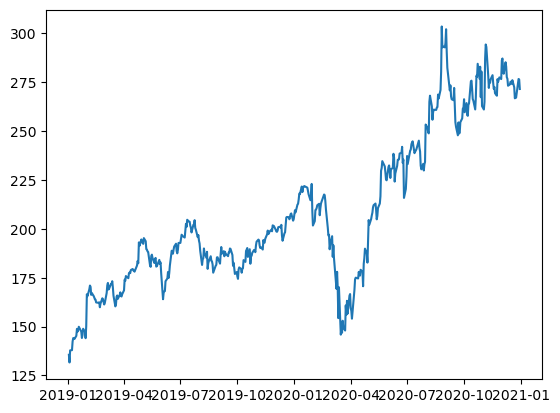

In [8]:
plt.plot(df['Date'], df['META'])

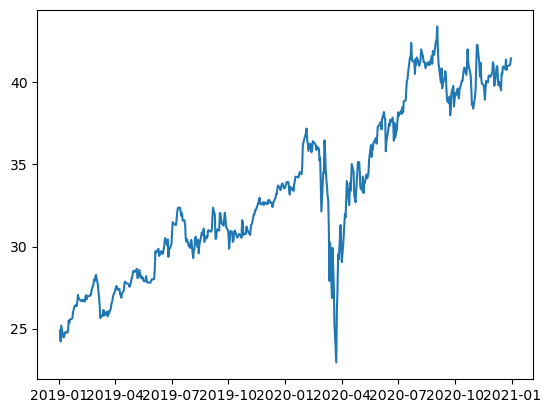

In [9]:
plt.plot(df['Date'], df['NASDAQ'])

In [10]:
meta = df['META']
nasdaq = df['NASDAQ']

In [11]:
meta_daily_returns = meta.pct_change()

In [12]:
nasdaq_daily_returns = nasdaq.pct_change()

In [13]:
meta_daily_returns.mean()*252

0.42044295281549954

In [14]:
nasdaq_daily_returns.mean()*252

0.30908981057613993

In [15]:
meta_daily_returns.std()*252**0.5

0.379546288764795

In [16]:
nasdaq_daily_returns.std()*252**0.5

0.32761420038803984

In [17]:
clean_meta_daily_returns = meta_daily_returns.dropna(axis=0)
clean_nasdaq_daily_returns = nasdaq_daily_returns.dropna(axis=0)

In [18]:
data = np.array([clean_meta_daily_returns,clean_nasdaq_daily_returns])

In [19]:
covMatrix = np.cov(data,bias=True)
print(covMatrix)

[[0.00057051 0.00025336]
 [0.00025336 0.00042507]]


In [20]:
beta = covMatrix[0] [1] / covMatrix[1] [1]
print(beta)

0.5960323150367035


In [21]:
import os
os.chdir('/Users/divine/Documents/MBS /PGE 2 /S2/Finance appliquée avec Python /Rapport/2019:2020') 

In [22]:
data = pd.read_excel('PORT2019.xlsx')

In [23]:
data.head()

,Date,META,NVIDIA,ALPHABET INC.,MICROSOFT,BAIDU
0,2019-01-02,135.536194,33.788902,52.292500,95.846024,143.000000
1,2019-01-03,131.600372,31.747469,50.803001,92.320030,137.250000
2,2019-01-04,137.803787,33.781452,53.535500,96.613777,142.360001
3,2019-01-07,137.903687,35.569859,53.419498,96.737015,142.000000
4,2019-01-08,142.378937,34.684345,53.813999,97.438408,139.110001


In [24]:
stocks = data.drop(columns=["Date"])
stocks.head()

,META,NVIDIA,ALPHABET INC.,MICROSOFT,BAIDU
0,135.536194,33.788902,52.292500,95.846024,143.000000
1,131.600372,31.747469,50.803001,92.320030,137.250000
2,137.803787,33.781452,53.535500,96.613777,142.360001
3,137.903687,35.569859,53.419498,96.737015,142.000000
4,142.378937,34.684345,53.813999,97.438408,139.110001


In [25]:
stock_normed = stocks/stocks.iloc[0] 

<Axes: >

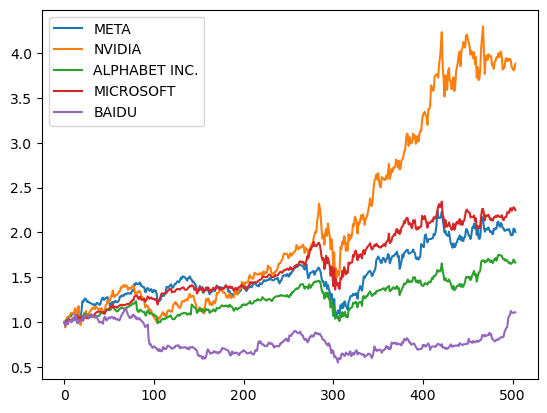

In [26]:
stock_normed.plot()

In [27]:
log_ret = np.log(stocks/stocks.shift(1))

In [28]:
log_ret.mean() * 252

META             0.348203
NVIDIA           0.679475
ALPHABET INC.    0.254895
MICROSOFT        0.405877
BAIDU            0.051241
dtype: float64

In [29]:
log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
META,503.0,0.001382,0.023938,-0.153769,-0.009162,0.001491,0.013407,0.102704
NVIDIA,503.0,0.002696,0.031660,-0.203979,-0.012051,0.003347,0.018462,0.158340
ALPHABET INC.,503.0,0.001011,0.020220,-0.117667,-0.006609,0.001556,0.010800,0.099380
MICROSOFT,503.0,0.001611,0.021527,-0.159454,-0.007251,0.001906,0.010994,0.132929
BAIDU,503.0,0.000203,0.027396,-0.180884,-0.014601,0.000000,0.013521,0.106182


In [30]:
log_ret.cov()

,META,NVIDIA,ALPHABET INC.,MICROSOFT,BAIDU
META,0.000573,0.000475,0.000360,0.000369,0.000028
NVIDIA,0.000475,0.001002,0.000427,0.000523,0.000065
ALPHABET INC.,0.000360,0.000427,0.000409,0.000348,0.000007
MICROSOFT,0.000369,0.000523,0.000348,0.000463,0.000008
BAIDU,0.000028,0.000065,0.000007,0.000008,0.000751


In [31]:
log_ret.corr()
print(log_ret.corr())

                   META    NVIDIA  ALPHABET INC.  MICROSOFT     BAIDU
META           1.000000  0.626848       0.743420   0.716413  0.041960
NVIDIA         0.626848  1.000000       0.666336   0.767603  0.075047
ALPHABET INC.  0.743420  0.666336       1.000000   0.799685  0.012097
MICROSOFT      0.716413  0.767603       0.799685   1.000000  0.013581
BAIDU          0.041960  0.075047       0.012097   0.013581  1.000000


In [32]:
num_ports = 15000
all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)
nb_assets = stocks.shape[1] 

In [33]:
for ind in range(num_ports):    
    weights = np.array(np.random.random(nb_assets))      
    weights = weights / np.sum(weights)
    all_weights[ind,:] = weights
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [34]:
sharpe_arr.max()
optimal = sharpe_arr.argmax()
print(optimal)

9343


In [35]:
optimal_pf = all_weights[optimal,:] 

In [36]:
o_w = optimal_pf.tolist() 

In [37]:
weights_sim = dict(zip(stocks, o_w)) 

In [38]:
optimal_weights = pd.DataFrame.from_dict(weights_sim, orient='index', columns=['Weight in %'])
optimal_weights = optimal_weights*100
optimal_weights = optimal_weights.round(decimals = 2)
optimal_weights = optimal_weights.sort_values(by=['Weight in %'], ascending = False)
optimal_weights

,Weight in %
NVIDIA,61.84
MICROSOFT,29.34
BAIDU,5.09
META,3.55
ALPHABET INC.,0.19


In [39]:
max_sr_ret = ret_arr[optimal]
max_sr_vol = vol_arr[optimal]
max_sr = sharpe_arr[optimal]

In [40]:
print('La rentabilité du portefeuille optimal est',max_sr_ret*100,'%')
print('La volatilité du portefeuille optimal est',max_sr_vol*100,'%')
print('Le ratio de Sharpe du portefeuille optimal est',max_sr)

La rentabilité du portefeuille optimal est 55.46916729324216 %
La volatilité du portefeuille optimal est 40.47453546263056 %
Le ratio de Sharpe du portefeuille optimal est 1.3704707579523892


Text(0, 0.5, 'Return')

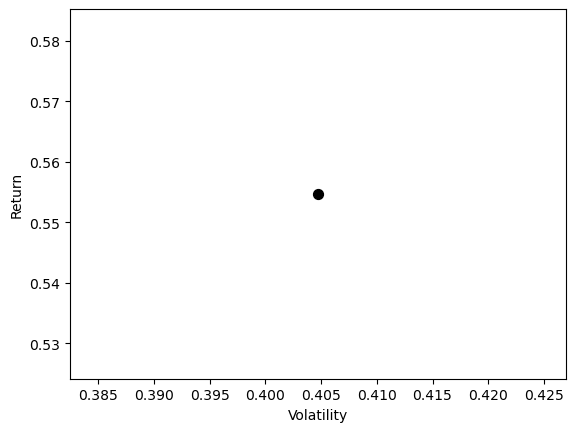

In [41]:
plt.scatter(max_sr_vol,max_sr_ret,c='black',s=50,edgecolors='black')
plt.xlabel('Volatility')
plt.ylabel('Return')

Text(0, 0.5, 'Return')

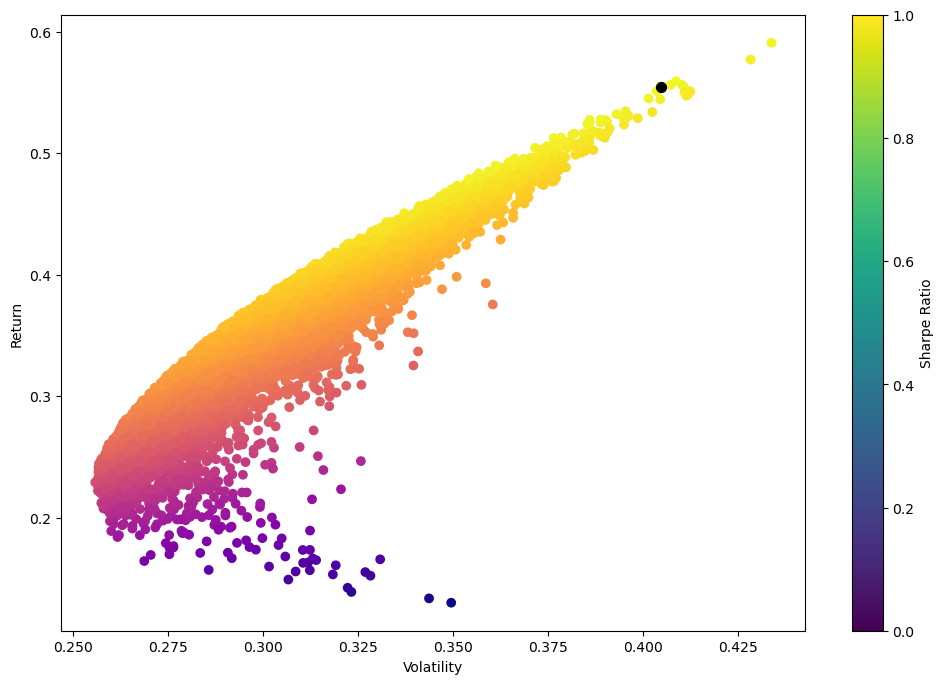

In [42]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.scatter(max_sr_vol,max_sr_ret,c='black',s=50,edgecolors='black')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')